# Detecção de fraudes em cartões de crédito.

In [9]:
# Ignorar Warnings:

from warnings import simplefilter

In [10]:
# Importando as bibliótecas:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler

In [11]:
# Configurando o estilo dos gráficos com o Seaborn:

sns.set_style('dark')

In [12]:
# Carregando os dados:

dados = pd.read_csv('creditcard.csv')
dados.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
# Verificando estatísticas:

dados.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [13]:
# Verificando se existem valores ausentes:

dados.isnull().sum().max()

0

In [14]:
# Verificando balanceamento das classes:

print(dados.Class.value_counts())
print('\nFraudes representam {:.4f}% dos dados.\n'.format((dados[dados.Class == 1].shape[0] / dados.shape[0]) * 100))

0    284315
1       492
Name: Class, dtype: int64

Fraudes representam 0.1727% dos dados.



C:\Users\netto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

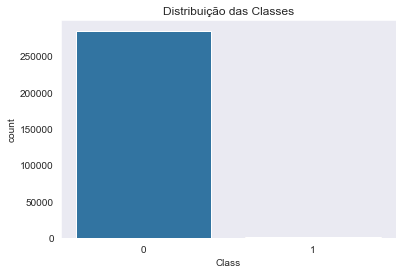

In [16]:
# Plotando gráfico de barras para as classes:

fig, ax = plt.subplots()
sns.countplot('Class', data = dados, ax = ax)
ax.set_title('Distribuição das Classes')
plt.plot()

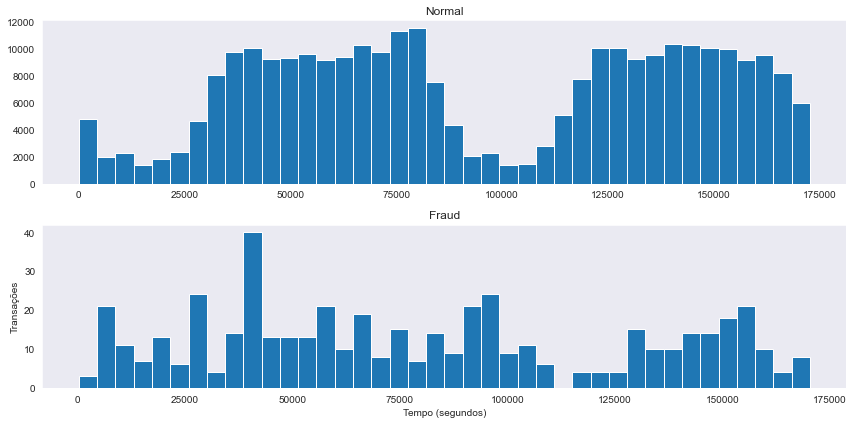

In [15]:
# Plotando gráficos de barras para comparar distribuição de classes:

fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (12,6))
num_bins = 40

ax[0].hist(dados.Time[dados.Class == 0], bins = num_bins)
ax[0].set_title('Normal')

ax[1].hist(dados.Time[dados.Class == 1], bins = num_bins)
ax[1].set_title('Fraud')

plt.xlabel('Tempo (segundos)')
plt.ylabel('Transações')
plt.tight_layout()

C:\Users\netto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


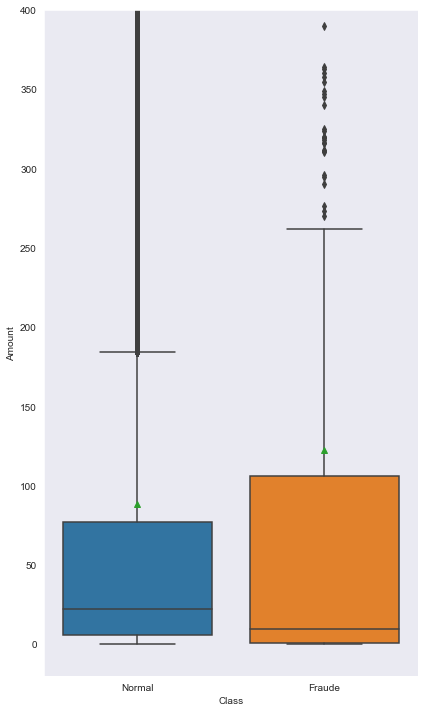

In [16]:
# Plotando informações estatísticas:

fig, ax = plt.subplots(figsize = (6,10), sharex = True)
sns.boxplot(dados.Class, dados.Amount, showmeans = True, ax = ax)
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraude'])
plt.tight_layout()

In [17]:
# Informações estatísticas:

dados[(dados.Class == 1) & (dados.Amount < 2000)]['Amount'].describe()

count     491.000000
mean      118.130550
std       240.439028
min         0.000000
25%         1.000000
50%         9.210000
75%       105.350000
max      1809.680000
Name: Amount, dtype: float64

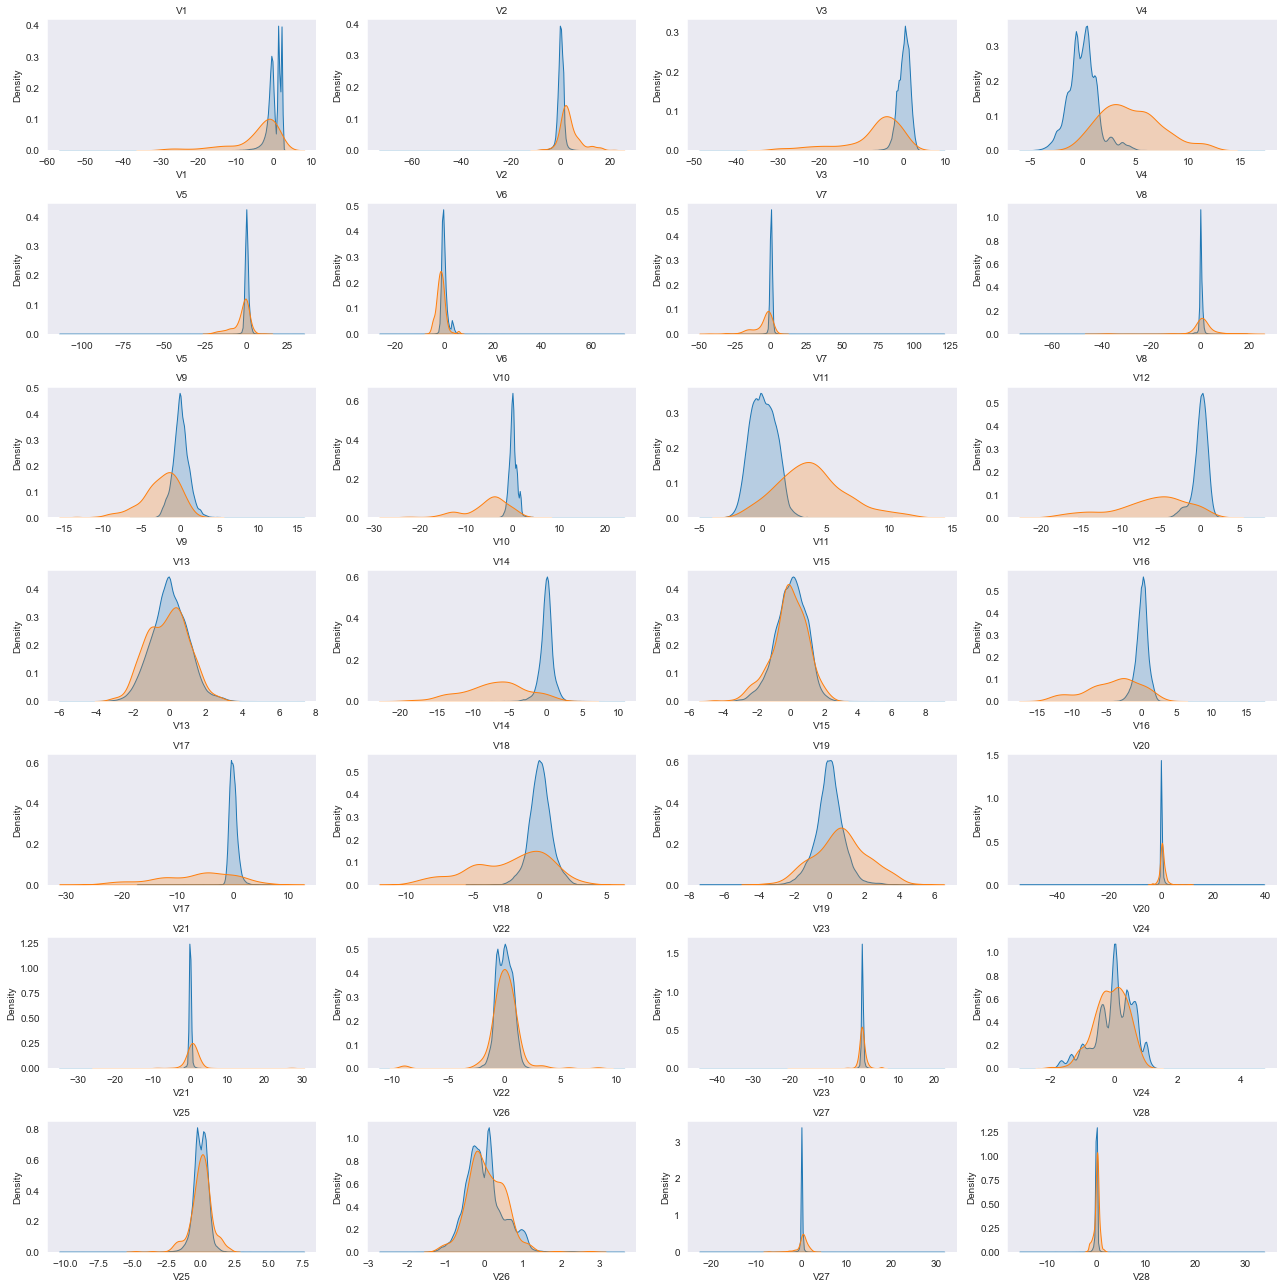

In [26]:
# Plotando gráficos resumindo etapa exploratória:

column_names = dados.drop(['Class', 'Amount', 'Time'], axis = 1).columns
num_plots = len(column_names)
dados_class_0 = dados[dados.Class == 0]
dados_class_1 = dados[dados.Class == 1]

fig, ax = plt.subplots(nrows = 7, ncols = 4, figsize = (18,18))
fig.subplots_adjust(hspace = 1, wspace = 1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(dados_class_0[col], label = 'Class 0', shade = True)
    sns.kdeplot(dados_class_1[col], label = 'Class 1', shade = True)
    plt.title(col, fontsize = 10)
plt.tight_layout()

# Regressão Logística - Preparação dos dados.

In [90]:
# Padronizando as colunas Timne e Amount:

dados_clean = dados.copy()

std_scaler = StandardScaler()
dados_clean['std_amount'] = std_scaler.fit_transform(dados_clean['Amount'].values.reshape (-1, 1))
dados_clean['std_time'] = std_scaler.fit_transform(dados_clean['Time'].values.reshape (-1, 1))
dados_clean.drop(['Time', 'Amount'], axis = 1, inplace = True)

In [91]:
# Exibindo os primeiros resultados:

dados_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [92]:
# Seprando variáveis entre x e y:

X = dados_clean.drop('Class', axis = 1)
y = dados['Class']

In [93]:
# Dividindo entre treino e teste:

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, shuffle = True)

# Balanceando os dados.

0    369
1    369
Name: Class, dtype: int64


C:\Users\netto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


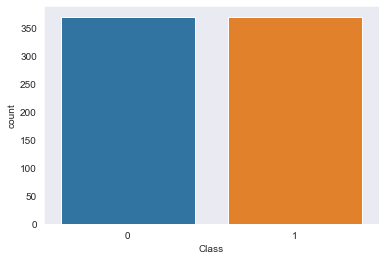

In [100]:
# Usando técnica under-sampling:

rus = RandomUnderSampler()
X_res, y_res = rus.fit_resample(X_train, y_train)
    
# Ver o balanceamento das classes:

print(pd.Series(y_res).value_counts())
    
# Plotando a nova distribuição de classes:

sns.countplot(y_res);

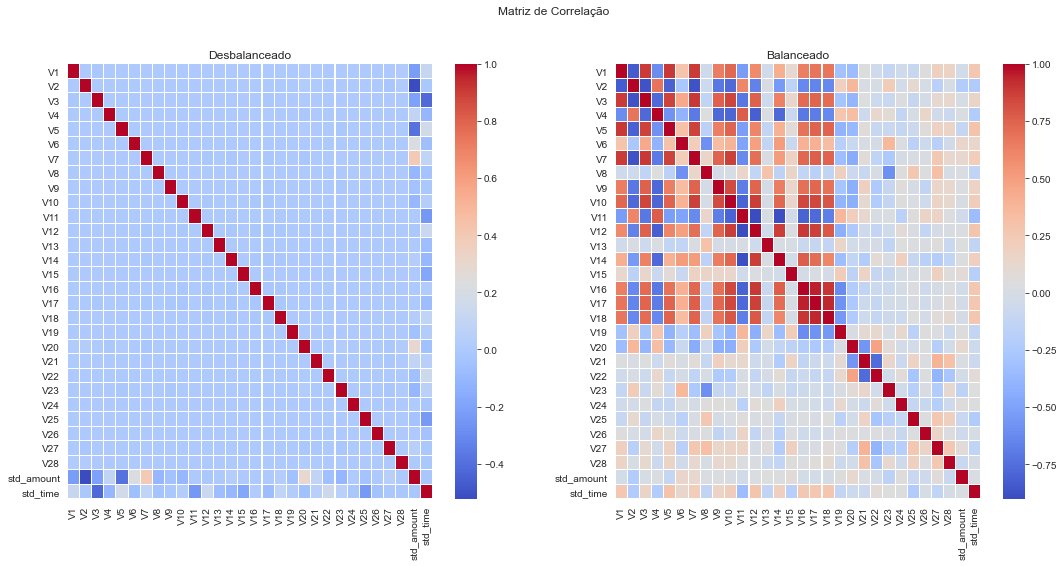

In [109]:
# Plotando a matriz de correlação:

corr = X_train.corr()
corr_res = pd.DataFrame(X_res).corr()

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns,
           linewidths = .1, cmap = 'coolwarm', ax = ax [0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_res, xticklabels = corr.columns, yticklabels = corr.columns,
           linewidths = .1, cmap = 'coolwarm', ax = ax[1])
ax[1].set_title('Balanceado')

plt.show()

# Modelo de Machine Learn.

In [110]:
# Instanciando e treinando o modelo de Regressão Logística:

np.random.seed(2)
model = LogisticRegression()
model.fit(X_res, y_res)

# Realizando previsões em cima dos dados de teste:

y_pred = model.predict(X_test)
y_proba = model = model.predict_proba(X_test)

Relatório de |Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9732    0.9863     71079
           1     0.0551    0.9024    0.1039       123

    accuracy                         0.9731     71202
   macro avg     0.5275    0.9378    0.5451     71202
weighted avg     0.9982    0.9731    0.9848     71202

Acurácia: 0.9731

AUC: 0.9378



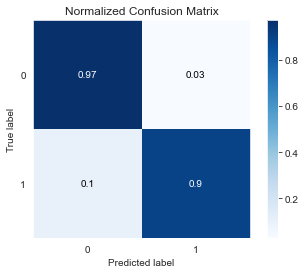

In [114]:
# Plotando a matrix de confusão:

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize = True)

# Imprimindo relatório de classificação:

print('Relatório de |Classificação:\n', classification_report(y_test, y_pred, digits = 4))

# Imprimindo a acurácia do modelo:

print('Acurácia: {:.4f}\n'.format(accuracy_score(y_test, y_pred)))

# Imprimindo a áreasob a curva:

print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred)))